Train data shape: (1460, 81)
Test data shape: (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


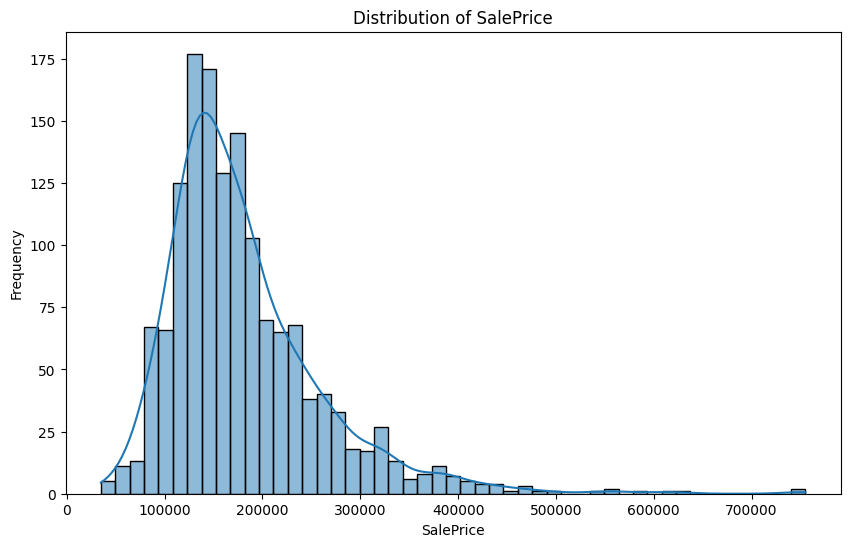

ValueError: could not convert string to float: 'RL'

<Figure size 1600x1200 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display basic information about the data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print(train_data.info())
print(train_data.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(16, 12))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Separate the target variable from the features
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Preprocess the training data and fit the model
clf.fit(X_train, y_train)

# Preprocess the validation data and make predictions
y_pred = clf.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Predicted vs Actual SalePrice')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', lw=2)
plt.show()

# Extract feature importances from the model
feature_importances = clf.named_steps['model'].feature_importances_
feature_names = numerical_cols + list(clf.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_cols))
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False).head(20)  # Top 20 features
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Top 20 Feature Importances')
plt.show()

# Preprocess the test data and make predictions
test_preds = clf.predict(test_data)

# Prepare the submission dataframe
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_preds
})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display basic information about the data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print(train_data.info())
print(train_data.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(16, 12))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Separate the target variable from the features
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Preprocess the training data and fit the model
clf.fit(X_train, y_train)

# Preprocess the validation data and make predictions
y_pred = clf.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Predicted vs Actual SalePrice')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', lw=2)
plt.show()

# Extract feature importances from the model
feature_importances = clf.named_steps['model'].feature_importances_
onehot_columns = clf.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_cols)
feature_names = numerical_cols + list(onehot_columns)
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False).head(20)  # Top 20 features
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Top 20 Feature Importances')
plt.show()

# Preprocess the test data and make predictions
test_data_preprocessed = preprocessor.transform(test_data)
test_preds = clf.named_steps['model'].predict(test_data_preprocessed)

# Prepare the submission dataframe
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_preds
})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display basic information about the data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print(train_data.info())
print(train_data.describe())

# Separate the target variable from the features
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Preprocess the training data and fit the model
clf.fit(X_train, y_train)

# Preprocess the validation data and make predictions
y_pred = clf.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Preprocess the test data and make predictions
test_preds = clf.predict(test_data)

# Prepare the submission dataframe
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_preds
})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")


Train data shape: (1460, 81)
Test data shape: (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

Root Mean Squared Error (RMSE): 28527.52033809099
Submission file created successfully!


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

Train data shape: (1460, 81)
Test data shape: (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


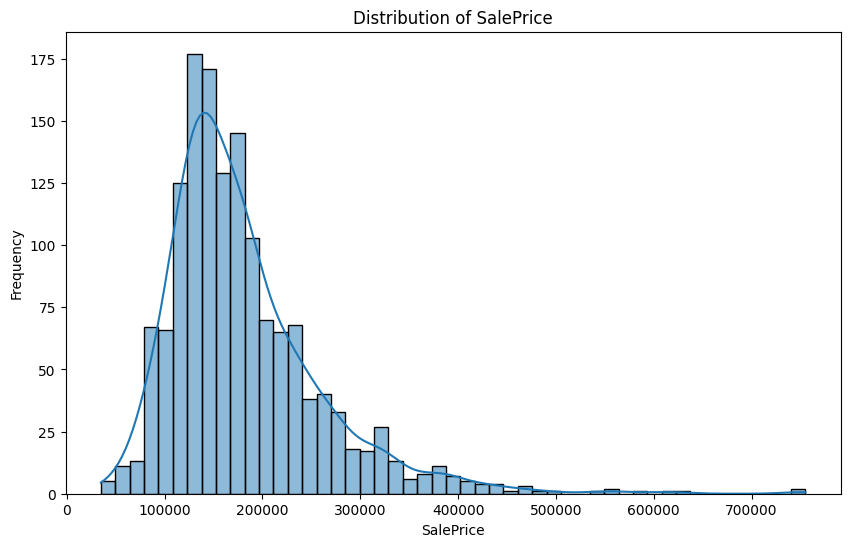

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')

# Display basic information about the data
print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)
print(train_df.info())
print(train_df.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


